<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/ML/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀분석 개념
ref : https://movefast.tistory.com/302
* 예제 코드 사용 데이터셋: 보스턴 주택 가격  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# boston 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1-1. 선형 회귀

## 1-2. 다항 회귀

* 항이 여러 개인 가설 함수로 결과를 예측하는 회귀 분석 방법이다.

* 항은 제곱근이나 2차항, 3차항 등 다양하게 있으며 함수의 형태가 비선형이라는 특징이 있다.

* 다항 회귀를 활용하는 한 가지 방법은 서로 다른 두 Feature 를 하나의 feature로 만들어서 해당 feature를 입력으로 2차 이상의 함수를 예측하는 것이다.

    - 예를 들어, 부동산에서 집값 예측 시 땅의 가로/세로 길이가 주어졌을 때 면적(=가로*세로)으로 만들어서 면적에 따른 결과를 예측하기

    - 새 feature 에 대해 그래프를 그렸을 때 데이터를 잘 표현하는 비선형 함수를 찾아야 한다.

    - 새 feature 에 대해서도 feature scaling 을 적절히 해주어야 한다. 특히, 실수의 곱이나 범위가 큰 두 feature의 곱은 너무 0에 가깝거나 너무 큰 수가 되버릴 수 있다.

* 보통 2차함수는 중간에 하강하므로 3차(cubic) 함수부터 아니면 단조증가하는 제곱근이나 로그 함수를 많이 쓴다.

<img width="500" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FI5kYW%2FbtqWjq4CRxM%2FNnMnMm35qhqESp6HGQ7Of0%2Fimg.png"></img>

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

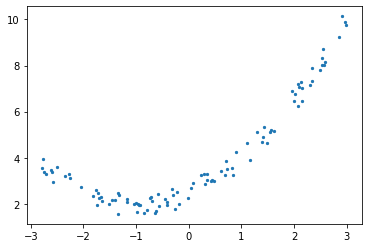

In [101]:
n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

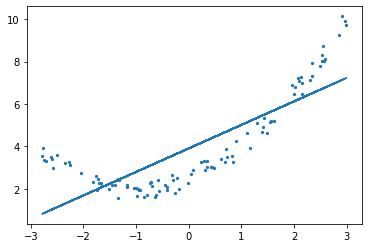

In [102]:
#선형회귀 그래프
lr=LinearRegression()
lr.fit(x, y)
y_preds=lr.predict(x)
plt.plot(x, y_preds)
plt.scatter(x, y, s=5)

In [103]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[0.98667603 0.5044756 ]]


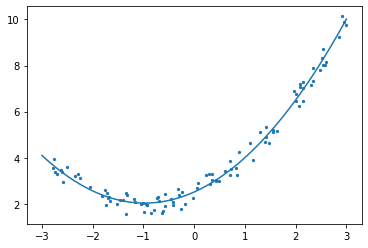

In [104]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)

## 1-3. 규제 선형 모델

## 1-4. 회귀트리

## 1-5. 다중공선성

## 1-6. 회귀 평가 지표

# 2. 회귀분석 모델 설명 및 코드

## 2-1. Linear Regression <선형회귀>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear#sklearn.linear_model.LinearRegression

### API
<img src="https://blog.kakaocdn.net/dn/Ee7JG/btrwkvJNF80/JEkRlREuwVuSbRmwCwpc40/img.png"></img>

### 파라미터 설명
* fit_intercept : bool, default=True
* - Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

* normalize : bool, default=False
* - This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

* copy_X : bool, default=True
* - If True, X will be copied; else, it may be overwritten.

* n_jobs : int, default=None
* - The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

* positive : bool, default=False
* - When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


### 예시코드(활용 예시)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 28.406, RMSE : 5.330
Variance Score : 0.649


In [ ]:
print('절편 값:',lr.intercept_)
#회귀계수값 (lr.ceof_)
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff

절편 값: 28.981270388095602


CRIM       -0.1
ZN          0.0
INDUS       0.1
CHAS        0.3
NOX       -14.3
RM          4.8
AGE        -0.0
DIS        -1.3
RAD         0.3
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

## 2-2. PolynomialFeatures <다항회귀>
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures, https://inuplace.tistory.com/515

### API
<img src="https://blog.kakaocdn.net/dn/brRspG/btrwnqVs3cY/jT1wNLT1rVkiYUpGEwn590/img.png"></img>

### 파라미터 설명
####degree : int or tuple (min_degree, max_degree), default=2
* If a single int is given, it specifies the maximal degree of the polynomial features. If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum polynomial degree of the generated features. Note that min_degree=0 and min_degree=1 are equivalent as outputting the degree zero term is determined by include_bias.

####interaction_only : bool, default=False
* If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:

included: x[0], x[1], x[0] * x[1], etc.<br>
excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

####include_bias : bool, default=True
* If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

####order : {‘C’, ‘F’}, default=’C’
* Order of output array in the dense case. 'F' order is faster to compute, but may slow down subsequent estimators.

### 예시코드(활용 예시)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 기본 다항식형태를 만들고
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_train_poly
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다.

array([[2.21880000e-01, 2.00000000e+01, 6.96000000e+00, ...,
        1.52701193e+05, 2.57126660e+03, 4.32964000e+01],
       [5.36000000e-02, 2.10000000e+01, 5.64000000e+00, ...,
        1.57529610e+05, 2.09563200e+03, 2.78784000e+01],
       [6.88800000e-02, 0.00000000e+00, 2.46000000e+00, ...,
        1.57529610e+05, 3.75070500e+03, 8.93025000e+01],
       ...,
       [3.51140000e-01, 0.00000000e+00, 7.38000000e+00, ...,
        1.57529610e+05, 3.05613000e+03, 5.92900000e+01],
       [9.18702000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.57529610e+05, 9.36684000e+03, 5.56960000e+02],
       [4.55587000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.25812090e+05, 2.52546400e+03, 5.06944000e+01]])

* PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)
* degree 옵션으로 차수를 조절한다.
* include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
* 이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [ ]:
np.array(X_train.iloc[0,:]), X_train_poly[0]

(array([2.2188e-01, 2.0000e+01, 6.9600e+00, 1.0000e+00, 4.6400e-01,
        7.6910e+00, 5.1800e+01, 4.3665e+00, 3.0000e+00, 2.2300e+02,
        1.8600e+01, 3.9077e+02, 6.5800e+00]),
 array([2.21880000e-01, 2.00000000e+01, 6.96000000e+00, 1.00000000e+00,
        4.64000000e-01, 7.69100000e+00, 5.18000000e+01, 4.36650000e+00,
        3.00000000e+00, 2.23000000e+02, 1.86000000e+01, 3.90770000e+02,
        6.58000000e+00, 4.92307344e-02, 4.43760000e+00, 1.54428480e+00,
        2.21880000e-01, 1.02952320e-01, 1.70647908e+00, 1.14933840e+01,
        9.68839020e-01, 6.65640000e-01, 4.94792400e+01, 4.12696800e+00,
        8.67040476e+01, 1.45997040e+00, 4.00000000e+02, 1.39200000e+02,
        2.00000000e+01, 9.28000000e+00, 1.53820000e+02, 1.03600000e+03,
        8.73300000e+01, 6.00000000e+01, 4.46000000e+03, 3.72000000e+02,
        7.81540000e+03, 1.31600000e+02, 4.84416000e+01, 6.96000000e+00,
        3.22944000e+00, 5.35293600e+01, 3.60528000e+02, 3.03908400e+01,
        2.08800000e+01, 1.

* fit_transform을 통해 위와 같이 각 피쳐를 곱한 항을 추가하여 반환한다. (a²,ab,ac,ac ..., b²,bc,bd, ...)

In [ ]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.
y_preds = lr.predict(X_test_poly)


In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 18.871, RMSE : 4.344
Variance Score : 0.767



* 선형회귀 모델을 만들고, 다항화한 x의 데이터와 기존의 y값을 모델에 fit시켜준다.
* 이를 통해 모델이 완성되었고 이를 활용할 수도 있다.

## 2-3. Ridge regression <릿지회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/dhrxxJ/btrwrImPw5i/Ftb6hEgSxS0Na9pLizWfaK/img.png"></img>

### 파라미터 설명
####alpha : {float, ndarray of shape (n_targets,)}, default=1.0
* Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

####fit_intercept : bool, default=True
* Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e. X and y are expected to be centered).

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####max_iter : int, default=None
* Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000.

####tol : float, default=1e-3
* Precision of the solution.

#### solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
* Solver to use in the computational routines:

* ‘auto’ chooses the solver automatically based on the type of data.

* ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.

* ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

* ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).

* ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

* ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

* ‘lbfgs’ uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.

* All last six solvers support both dense and sparse data. However, only ‘sag’, ‘sparse_cg’, and ‘lbfgs’ support sparse input when fit_intercept is True.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive. Only ‘lbfgs’ solver is supported in this case.

####random_state : int, RandomState instance, default=None
* Used when solver == ‘sag’ or ‘saga’ to shuffle the data. See Glossary for details.


### 예시코드(활용 예시)

## 2-4. Lasso regression <라쏘회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/bTRYDW/btrwonqpM2O/8DJlYEpwe1jEcfRNkOc2c1/img.png"></img>


### 파라미터 설명
#### alpha : float, default=1.0
* Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

#### fit_intercept : bool, default=True
* Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

* precomputebool or array-like of shape (n_features, n_features), default=False
Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####max_iter : int, default=1000
* The maximum number of iterations.

####tol : float, default=1e-4
* The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

####warm_start : bool, default=False
* When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive.

####random_state : int, RandomState instance, default=None
* The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls. See Glossary.

####selection : {‘cyclic’, ‘random’}, default=’cyclic’
* If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### 예시코드(활용 예시)

## 2-5. Elastic-net <엘라스틱 넷 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/cGSxOt/btrwmqOqsEP/l5uuo8qCJ5mpARl24KOpx0/img.png"></img>

### 파라미터 설명
####alpha : float, default=1.0
* Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

####l1_ratio : float, default=0.5
* The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

####fit_intercept : bool, default=True
* Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

####precompute : bool or array-like of shape (n_features, n_features), default=False
* Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

####max_iter : int, default=1000
* The maximum number of iterations.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####tol : float, default=1e-4
* The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

####warm_start : bool, default=False
* When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive.

####random_state : int, RandomState instance, default=None
* The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls. See Glossary.

####selection : {‘cyclic’, ‘random’}, default=’cyclic’
* f set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### 예시코드(활용 예시)

## 2-6. Random Forest regression <랜덤포레스트 회귀 - 회귀트리>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/VXFl7/btrwptKJXN7/qL2xJqZRlyLuIXEQlKIMK0/img.png"></img>

### 파라미터 설명

### 예시코드(활용 예시)

## 2-7. Extreme Gradient Boosting regression <XGB - 회귀트리>
ref: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

### API 스샷 -> 예시 코드

### 파라미터 설명

### 예시코드(활용 예시)

## 2-8. Light Gradient Boosting regression <LGBM - 회귀트리>

### API 스샷 -> 예시 코드

### 파라미터 설명

### 예시코드(활용 예시)

## 2-9. Catboost regression <Catboost - 회귀트리>

### API 스샷 -> 예시 코드

### 파라미터 설명

### 예시코드(활용 예시)

# 3. pycaret을 통한 모델 성능비교
* 데이터의 유형 혹은 파생변수에 따라서 모델의 성능이 다르다.
* pycaret의 AUTO ML을 통해 빠르게 여러 모델의 성능을 확인할 수 있다.
* pycaret을 통해 모델을 선정하고, 파라미터 튜닝 혹은 앙상블하여 유의미하게 활용할 수 있다.
* pycaret은 모델 성능 참고용으로 활용하고 튜닝, 앙상블은 사람이 직접하는 것이 좋다 (튜닝의 경우 pycaret보다 optuna 성능이 뛰어남) 

# 4. 회귀모델 `import` 모음
